In [1]:
library(faraway)
library(MASS)

In [2]:
data("rats")

In [3]:
dim(rats)

[1] 48  3

In [4]:
head(rats)

,time,poison,treat
,<dbl>,<fct>,<fct>
1,0.31,I,A
2,0.82,I,B
3,0.43,I,C
4,0.45,I,D
5,0.45,I,A
6,1.10,I,B


- Nếu 2 nhân tố thì phải viết lại thành 1 bảng 3 cột

In [5]:
str(rats)

'data.frame':	48 obs. of  3 variables:
 $ time  : num  0.31 0.82 0.43 0.45 0.45 1.1 0.45 0.71 0.46 0.88 ...
 $ poison: Factor w/ 3 levels "I","II","III": 1 1 1 1 1 1 1 1 1 1 ...
 $ treat : Factor w/ 4 levels "A","B","C","D": 1 2 3 4 1 2 3 4 1 2 ...


- 48 quan trắc
- Factor 1 có 3 nhóm, factor 2 có 4 nhóm

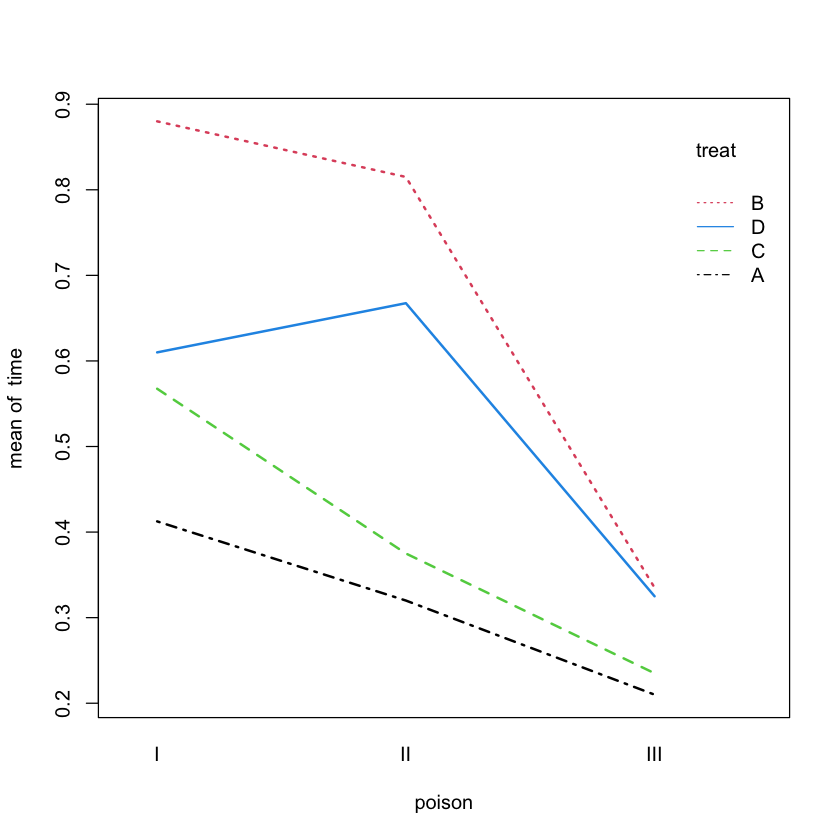

In [6]:
with(rats, interaction.plot(poison, treat, time, lwd = 2, col = 1:4))

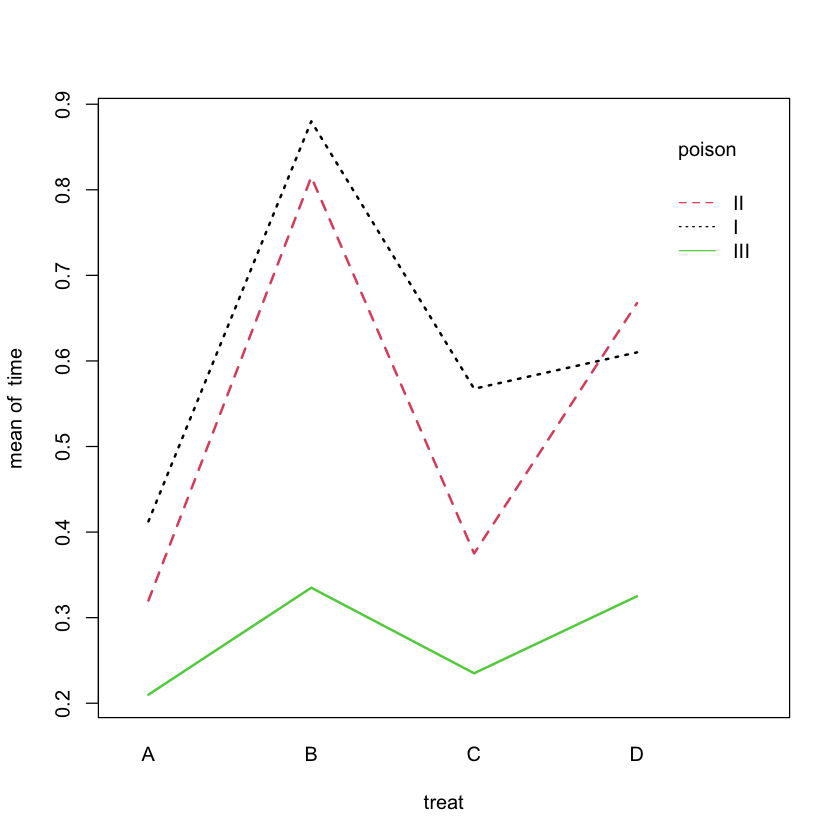

In [7]:
with(rats, interaction.plot(treat, poison, time, lwd = 2, col = 1:3))

- Theo biểu đồ ta thấy có thể có sự tương tác của hai nhân tố

- Nếu song song: hai nhân tố không có sự tương tác với nhau

## MÔ HÌNH NHÂN

In [8]:
rats_int = aov(time~poison *treat, data = rats)
rats_int

Call:
   aov(formula = time ~ poison * treat, data = rats)

Terms:
                   poison     treat poison:treat Residuals
Sum of Squares  1.0330125 0.9212062    0.2501375 0.8007250
Deg. of Freedom         2         3            6        36

Residual standard error: 0.1491387
Estimated effects may be unbalanced

In [9]:
summary(rats_int)

             Df Sum Sq Mean Sq F value   Pr(>F)    
poison        2 1.0330  0.5165  23.222 3.33e-07 ***
treat         3 0.9212  0.3071  13.806 3.78e-06 ***
poison:treat  6 0.2501  0.0417   1.874    0.112    
Residuals    36 0.8007  0.0222                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

- P giá trị > alpha => gama ij = 0
- Sự tương tác của hai nhân tố poison:treat dường như không có trong mô hình này với độ tin cậy 5%

- Vì không có sự tương tác giữa hai nhân tố, nên không thể dùng mô hình này để xác định ảnh hưởng của 1 nhân tố

## MÔ HÌNH CỘNG

In [10]:
rats_add = aov(time~poison + treat, data = rats)
rats_add

Call:
   aov(formula = time ~ poison + treat, data = rats)

Terms:
                   poison     treat Residuals
Sum of Squares  1.0330125 0.9212062 1.0508625
Deg. of Freedom         2         3        42

Residual standard error: 0.1581788
Estimated effects may be unbalanced

In [11]:
summary(rats_add)

            Df Sum Sq Mean Sq F value  Pr(>F)    
poison       2 1.0330  0.5165   20.64 5.7e-07 ***
treat        3 0.9212  0.3071   12.27 6.7e-06 ***
Residuals   42 1.0509  0.0250                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

- Với P-value của hai factor đều nhỏ, nên alpha i không đồng thời bằng 0, do đó ta đủ bằng chứng để bác bỏ giả thuyết rằng tất cả các alpha i đồng thời bằng 0
(P-value 1 là cho nhân tố thứ nhất tương ứng là alpha i, p-value thứ 2 là cho nhân tố thứ 2, tương ưng slaf beta i)

- Cả hai nhân tố đều có ảnh hưởng đến biến phụ thuộc

- Phải kiểm định epsilon chuẩn thoả thì mô hình mới có ý nghĩa, sau đó mới kiểm định Turkey

- Nếu không có phân phối chuẩn:
    - Phải dùng phương pháp biến đổi biến y (lấy log hoặc BoxCox hoặc kiểm định hoán vị)

In [12]:
shapiro.test(residuals(rats_add))


	Shapiro-Wilk normality test

data:  residuals(rats_add)
W = 0.92242, p-value = 0.003622


- Không thoả với 5% nhưng với 1% thì vẫn thoả tính chuẩn

### KIỂM ĐỊNH TURKEY - KIỂM ĐỊNH TỪNG CẶP GIÁ TRỊ

In [13]:
TukeyHSD(rats_add)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = time ~ poison + treat, data = rats)

$poison
            diff        lwr        upr     p adj
II-I   -0.073125 -0.2089936  0.0627436 0.3989657
III-I  -0.341250 -0.4771186 -0.2053814 0.0000008
III-II -0.268125 -0.4039936 -0.1322564 0.0000606

$treat
           diff         lwr         upr     p adj
B-A  0.36250000  0.18976135  0.53523865 0.0000083
C-A  0.07833333 -0.09440532  0.25107198 0.6221729
D-A  0.22000000  0.04726135  0.39273865 0.0076661
C-B -0.28416667 -0.45690532 -0.11142802 0.0004090
D-B -0.14250000 -0.31523865  0.03023865 0.1380432
D-C  0.14166667 -0.03107198  0.31440532 0.1416151


- diff: II_hat - I_hat
- lwr và upr: khoảng tin cậy (Cái này dựa vào phân vị của Turkey)
- p adj: kiểm định các cặp trung bình tính theo biến phụ thuộc

## BỘ DỮ LIỆU 2: warpbreaks

In [15]:
library(datasets)

In [16]:
warpbreaks

breaks,wool,tension
<dbl>,<fct>,<fct>
26,A,L
30,A,L
54,A,L
25,A,L
70,A,L
52,A,L
51,A,L
26,A,L
67,A,L


In [17]:
dim(warpbreaks)

[1] 54  3

In [18]:
head(warpbreaks)

,breaks,wool,tension
,<dbl>,<fct>,<fct>
1,26,A,L
2,30,A,L
3,54,A,L
4,25,A,L
5,70,A,L
6,52,A,L


In [19]:
str(warpbreaks)

'data.frame':	54 obs. of  3 variables:
 $ breaks : num  26 30 54 25 70 52 51 26 67 18 ...
 $ wool   : Factor w/ 2 levels "A","B": 1 1 1 1 1 1 1 1 1 1 ...
 $ tension: Factor w/ 3 levels "L","M","H": 1 1 1 1 1 1 1 1 1 2 ...


- ĐỘ bị bung
- wool:  loại len: A và B
- ĐỘ căng của khung dệt: L-M-H

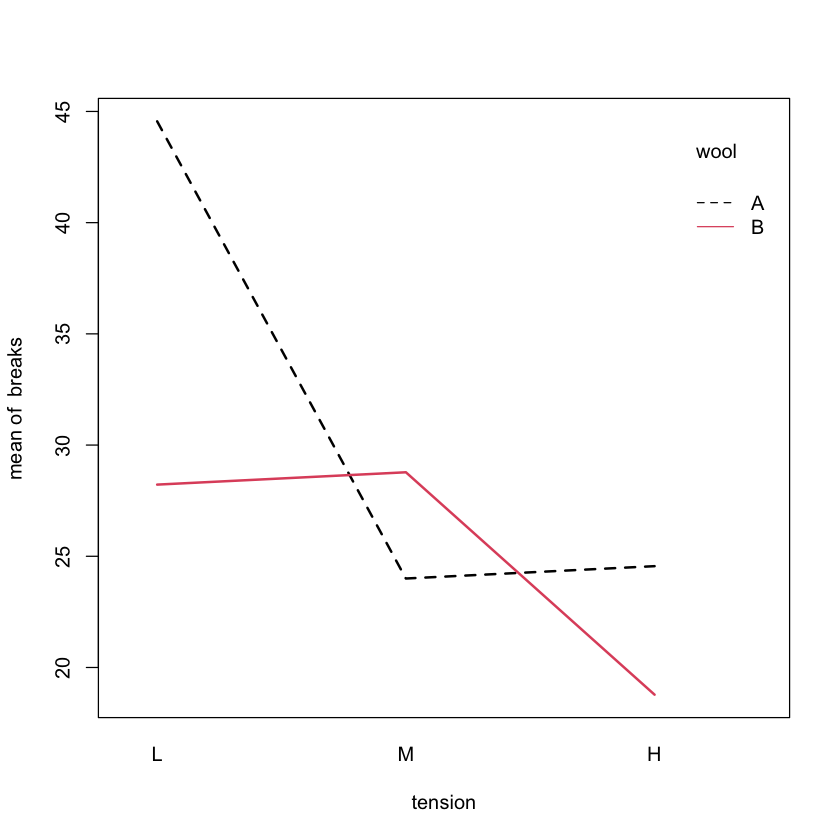

In [24]:
with(warpbreaks, interaction.plot(tension, wool, breaks, lwd = 2, col = 1:2))

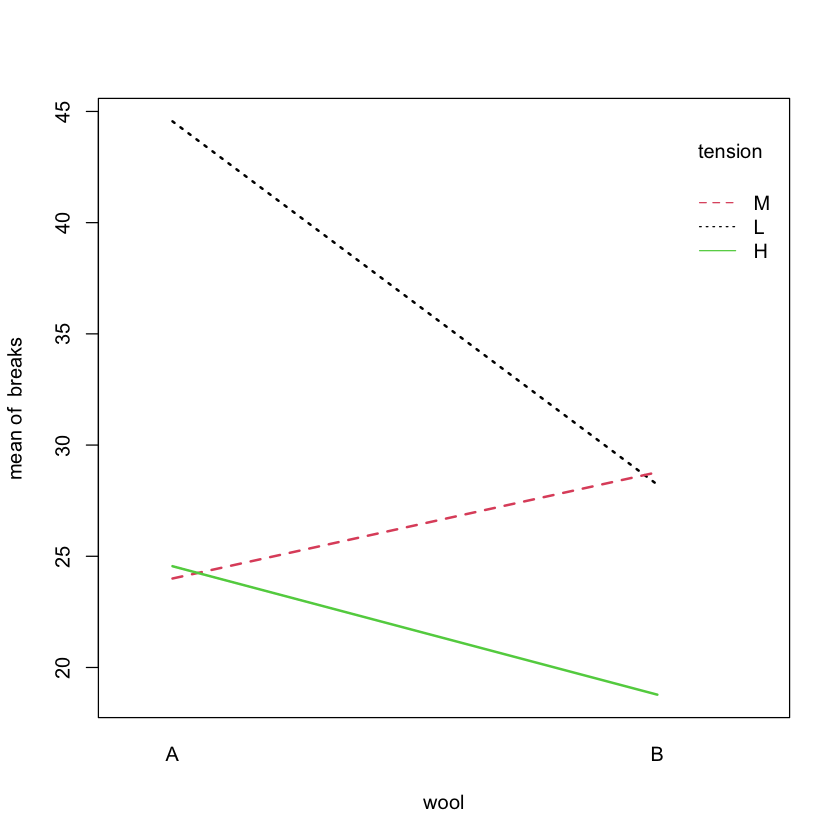

In [26]:
with(warpbreaks, interaction.plot(wool,tension,  breaks, lwd = 2, col = 1:3))

### MÔ HÌNH NHÂN

In [21]:
warpbreaks_int = aov(breaks~wool *tension, data = warpbreaks)
warpbreaks_int

Call:
   aov(formula = breaks ~ wool * tension, data = warpbreaks)

Terms:
                    wool  tension wool:tension Residuals
Sum of Squares   450.667 2034.259     1002.778  5745.111
Deg. of Freedom        1        2            2        48

Residual standard error: 10.94028
Estimated effects may be unbalanced

In [22]:
summary(warpbreaks_int)

             Df Sum Sq Mean Sq F value   Pr(>F)    
wool          1    451   450.7   3.765 0.058213 .  
tension       2   2034  1017.1   8.498 0.000693 ***
wool:tension  2   1003   501.4   4.189 0.021044 *  
Residuals    48   5745   119.7                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

- Với mức ý nghĩa 6% thì wool là có ý nghĩa với mô hình (nhưng với mức ý nghĩa 5% thì không có ý nghĩa)
- Với mức ý nghĩa 5% thì tension có ý nghĩa với mô hình
- Với mức ý nghĩa 5%: Hai biến wool:tension có sự tương tác 

In [27]:
shapiro.test(residuals(warpbreaks_int))


	Shapiro-Wilk normality test

data:  residuals(warpbreaks_int)
W = 0.98686, p-value = 0.8162


In [28]:
TukeyHSD(warpbreaks_int)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = breaks ~ wool * tension, data = warpbreaks)

$wool
         diff       lwr       upr    p adj
B-A -5.777778 -11.76458 0.2090243 0.058213

$tension
          diff       lwr       upr     p adj
M-L -10.000000 -18.81965 -1.180353 0.0228554
H-L -14.722222 -23.54187 -5.902575 0.0005595
H-M  -4.722222 -13.54187  4.097425 0.4049442

$`wool:tension`
               diff       lwr        upr     p adj
B:L-A:L -16.3333333 -31.63966  -1.027012 0.0302143
A:M-A:L -20.5555556 -35.86188  -5.249234 0.0029580
B:M-A:L -15.7777778 -31.08410  -0.471456 0.0398172
A:H-A:L -20.0000000 -35.30632  -4.693678 0.0040955
B:H-A:L -25.7777778 -41.08410 -10.471456 0.0001136
A:M-B:L  -4.2222222 -19.52854  11.084100 0.9626541
B:M-B:L   0.5555556 -14.75077  15.861877 0.9999978
A:H-B:L  -3.6666667 -18.97299  11.639655 0.9797123
B:H-B:L  -9.4444444 -24.75077   5.861877 0.4560950
B:M-A:M   4.7777778 -10.52854  20.084100 0.9377205


- Rồi nhận xét cho từng cặp, cặp nào có ảnh hưởng, cặp nào thì không

- Khi dùng lm: thì dữ liệu phải là factor
- Khi dùng aov: 
- khi cần ước lượng thì phải dùng lm
- lm đầy đủ hơn aov

In [29]:
library(car)

Loading required package: carData


Attaching package: 'car'


The following objects are masked from 'package:faraway':

    logit, vif




### NẾU MÔ HÌNH KHÔNG THOẢ

In [32]:
# Kiểm định phi tham số
# Dùng để kiểm định 2 trung bình có bằng nhau hay không
# Nếu nó không bằng nhau thì sẽ kiểm định Turkey trong phi tham số (là kiểm đị pairwise - Kru)
?kruskal.test

kruskal.test               package:stats               R Documentation

_K_r_u_s_k_a_l-_W_a_l_l_i_s _R_a_n_k _S_u_m _T_e_s_t

_D_e_s_c_r_i_p_t_i_o_n:

     Performs a Kruskal-Wallis rank sum test.

_U_s_a_g_e:

     kruskal.test(x, ...)
     
     ## Default S3 method:
     kruskal.test(x, g, ...)
     
     ## S3 method for class 'formula'
     kruskal.test(formula, data, subset, na.action, ...)
     
_A_r_g_u_m_e_n_t_s:

       x: a numeric vector of data values, or a list of numeric data
          vectors.  Non-numeric elements of a list will be coerced,
          with a warning.

       g: a vector or factor object giving the group for the
          corresponding elements of 'x'.  Ignored with a warning if 'x'
          is a list.

 formula: a formula of the form 'response ~ group' where 'response'
          gives the data values and 'group' a vector or factor of the
          corresponding groups.

    data: an optional matrix or da